In [60]:
import numpy as np
import pandas as pd
import sys
import os
import importlib

sys.path.append(os.path.abspath("../base"))
import classify
import features

In [69]:
importlib.reload(classify)  # Reload the classify module
importlib.reload(features)

<module 'features' from '/Users/kevinwong/Library/CloudStorage/GoogleDrive-kew024@ucsd.edu/My Drive/UCSD Winter Quarter 2025/dsc180b/dsc180b-capstone-q2/src/base/features.py'>

In [113]:
categories = pd.read_csv("../../data_q2/q2-ucsd-cat-map.csv")
consumer = pd.read_parquet("../../data_q2/q2-ucsd-consDF.pqt")
acct = pd.read_parquet("../../data_q2/q2-ucsd-acctIDF.pqt")
transactions = pd.read_parquet("../../data_q2/q2-ucsd-trxnDF.pqt")
pd.set_option("display.max_columns", None)

In [ ]:
# simplify based on credit or debit with negative
transactions["amount"] = transactions["amount"].where(
    transactions["credit_or_debit"] == "DEBIT", -transactions["amount"]
)

In [115]:
consumer_balance = features.get_balance(acct, consumer, transactions)
transaction_categories = features.get_transaction_categories(transactions, categories)
consumer_features = features.get_category_occurences_sums(transaction_categories, consumer_balance)
all_features = features.one_hot_accounts(acct, consumer_features)
all_features = features.all_cat_percent(all_features, transactions, consumer, categories)
all_features = features.running_total(all_features, transactions)

In [116]:
all_features.head()

,prism_consumer_id,evaluation_date,credit_score,DQ_TARGET,balance,std_credit,outflow_occurences_ACCOUNT_FEES,outflow_occurences_ATM_CASH,outflow_occurences_AUTOMOTIVE,outflow_occurences_AUTO_LOAN,outflow_occurences_BANKING_CATCH_ALL,outflow_occurences_BILLS_UTILITIES,outflow_occurences_BNPL,outflow_occurences_CHILD_DEPENDENTS,outflow_occurences_CORPORATE_PAYMENTS,outflow_occurences_CREDIT_CARD_PAYMENT,outflow_occurences_DEBT,outflow_occurences_EDUCATION,outflow_occurences_ENTERTAINMENT,outflow_occurences_ESSENTIAL_SERVICES,outflow_occurences_EXTERNAL_TRANSFER,outflow_occurences_FITNESS,outflow_occurences_FOOD_AND_BEVERAGES,outflow_occurences_GAMBLING,outflow_occurences_GENERAL_MERCHANDISE,outflow_occurences_GIFTS_DONATIONS,outflow_occurences_GOVERNMENT_SERVICES,outflow_occurences_GROCERIES,outflow_occurences_HEALTHCARE_MEDICAL,outflow_occurences_HOME_IMPROVEMENT,outflow_occurences_INSURANCE,outflow_occurences_INVESTMENT,outflow_occurences_LEGAL,outflow_occurences_LOAN,outflow_occurences_MISCELLANEOUS,outflow_occurences_MORTGAGE,outflow_occurences_OVERDRAFT,outflow_occurences_PETS,outflow_occurences_RENT,outflow_occurences_RISK_CATCH_ALL,outflow_occurences_RTO_LTO,outflow_occurences_SELF_TRANSFER,outflow_occurences_TAX,outflow_occurences_TRANSPORATION,outflow_occurences_TRAVEL,outflow_sums_ACCOUNT_FEES,outflow_sums_ATM_CASH,outflow_sums_AUTOMOTIVE,outflow_sums_AUTO_LOAN,outflow_sums_BANKING_CATCH_ALL,outflow_sums_BILLS_UTILITIES,outflow_sums_BNPL,outflow_sums_CHILD_DEPENDENTS,outflow_sums_CORPORATE_PAYMENTS,outflow_sums_CREDIT_CARD_PAYMENT,outflow_sums_DEBT,outflow_sums_EDUCATION,outflow_sums_ENTERTAINMENT,outflow_sums_ESSENTIAL_SERVICES,outflow_sums_EXTERNAL_TRANSFER,outflow_sums_FITNESS,outflow_sums_FOOD_AND_BEVERAGES,outflow_sums_GAMBLING,outflow_sums_GENERAL_MERCHANDISE,outflow_sums_GIFTS_DONATIONS,outflow_sums_GOVERNMENT_SERVICES,outflow_sums_GROCERIES,outflow_sums_HEALTHCARE_MEDICAL,outflow_sums_HOME_IMPROVEMENT,outflow_sums_INSURANCE,outflow_sums_INVESTMENT,outflow_sums_LEGAL,outflow_sums_LOAN,outflow_sums_MISCELLANEOUS,outflow_sums_MORTGAGE,outflow_sums_OVERDRAFT,outflow_sums_PETS,outflow_sums_RENT,outflow_sums_RISK_CATCH_ALL,outflow_sums_RTO_LTO,outflow_sums_SELF_TRANSFER,outflow_sums_TAX,outflow_sums_TRANSPORATION,outflow_sums_TRAVEL,inflow_occurrences_CORPORATE_PAYMENTS,inflow_occurrences_DEPOSIT,inflow_occurrences_EXTERNAL_TRANSFER,inflow_occurrences_GAMBLING,inflow_occurrences_INSURANCE,inflow_occurrences_INVESTMENT,inflow_occurrences_INVESTMENT_INCOME,inflow_occurrences_LOAN,inflow_occurrences_MISCELLANEOUS,inflow_occurrences_OTHER_BENEFITS,inflow_occurrences_PAYCHECK,inflow_occurrences_PENSION,inflow_occurrences_REFUND,inflow_occurrences_SELF_TRANSFER,inflow_occurrences_TAX,inflow_occurrences_TIME_OR_STUFF,inflow_occurrences_UNEMPLOYMENT_BENEFITS,inflow_sums_CORPORATE_PAYMENTS,inflow_sums_DEPOSIT,inflow_sums_EXTERNAL_TRANSFER,inflow_sums_GAMBLING,inflow_sums_INSURANCE,inflow_sums_INVESTMENT,inflow_sums_INVESTMENT_INCOME,inflow_sums_LOAN,inflow_sums_MISCELLANEOUS,inflow_sums_OTHER_BENEFITS,inflow_sums_PAYCHECK,inflow_sums_PENSION,inflow_sums_REFUND,inflow_sums_SELF_TRANSFER,inflow_sums_TAX,inflow_sums_TIME_OR_STUFF,inflow_sums_UNEMPLOYMENT_BENEFITS,account_type_401K,account_type_AUTO,account_type_BROKERAGE,account_type_CASH MANAGEMENT,account_type_CD,account_type_CHECKING,account_type_CONSUMER,account_type_CREDIT CARD,account_type_HOME EQUITY,account_type_HSA,account_type_IRA,account_type_LINE OF CREDIT,account_type_LOAN,account_type_MONEY MARKET,account_type_MONEYMARKET,account_type_MORTGAGE,account_type_OTHER,account_type_OVERDRAFT,account_type_PREPAID,account_type_RETIREMENT,account_type_ROTH,account_type_SAVINGS,account_type_STOCK PLAN,account_type_STUDENT,credit_percentage_SELF_TRANSFER,credit_percentage_EXTERNAL_TRANSFER,credit_percentage_DEPOSIT,credit_percentage_PAYCHECK,credit_percentage_MISCELLANEOUS,credit_percentage_REFUND,credit_percentage_INVESTMENT_INCOME,credit_percentage_OTHER_BENEFITS,credit_perc


Logistic Regression Results
ROC-AUC: 0.746 | Accuracy: 0.737
Training Time: 1.3s
              precision    recall  f1-score   support

         0.0       0.96      0.75      0.84      1781
         1.0       0.18      0.62      0.27       154

    accuracy                           0.74      1935
   macro avg       0.57      0.69      0.56      1935
weighted avg       0.90      0.74      0.79      1935


Random Forest Results
ROC-AUC: 0.787 | Accuracy: 0.899
Training Time: 11.4s
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      1781
         1.0       0.30      0.21      0.25       154

    accuracy                           0.90      1935
   macro avg       0.62      0.58      0.60      1935
weighted avg       0.88      0.90      0.89      1935

[LightGBM] [Info] Number of positive: 6644, number of negative: 6644
[LightGBM] [Info] Total Bins 54227
[LightGBM] [Info] Number of data points in the train set: 13288, number of used fea

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:17:43] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results
ROC-AUC: 0.760 | Accuracy: 0.872
Training Time: 1.5s
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93      1781
         1.0       0.27      0.34      0.30       154

    accuracy                           0.87      1935
   macro avg       0.60      0.63      0.62      1935
weighted avg       0.89      0.87      0.88      1935


CatBoost Results
ROC-AUC: 0.816 | Accuracy: 0.912
Training Time: 20.3s
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      1781
         1.0       0.38      0.16      0.22       154

    accuracy                           0.91      1935
   macro avg       0.65      0.57      0.59      1935
weighted avg       0.89      0.91      0.90      1935


HistGB Results
ROC-AUC: 0.813 | Accuracy: 0.912
Training Time: 3.6s
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      1781
         1.0       0.39   

/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]



Top Features (RandomForestClassifier):
                        Feature  Importance  Correlation
                     std_credit    0.046398    -0.276088
           account_type_SAVINGS    0.027691    -0.110539
  debit_percentage_ACCOUNT_FEES    0.025507     0.021161
                        balance    0.024172    -0.038574
outflow_occurences_ACCOUNT_FEES    0.018252     0.023668
      outflow_sums_ACCOUNT_FEES    0.017641     0.009465
     debit_percentage_OVERDRAFT    0.016917     0.109643
          debit_percentage_BNPL    0.016844     0.061273
   outflow_occurences_OVERDRAFT    0.016714     0.076372
              outflow_sums_LOAN    0.014934    -0.016022

Top Features (BalancedRandomForestClassifier):
                            Feature  Importance  Correlation
                         std_credit    0.048908    -0.276088
               account_type_SAVINGS    0.039761    -0.110539
                            balance    0.024940    -0.038574
    outflow_occurences_ACCOUNT_FEES    0.

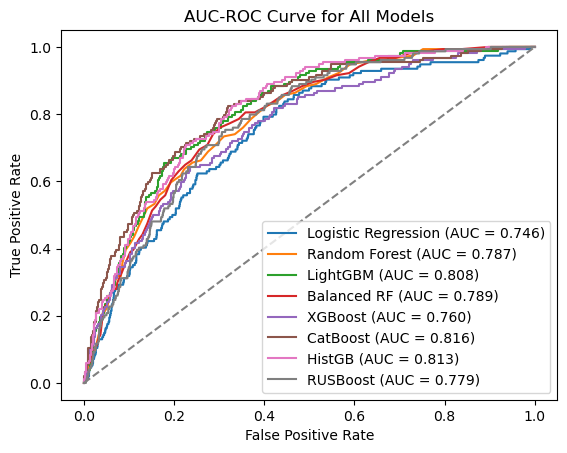

In [ ]:
classification_features = (all_features.drop(columns = ['prism_consumer_id', 'evaluation_date', 'DQ_TARGET'])).columns
classify.run_classification(classification_features, "DQ_TARGET", all_features)

In [64]:
best_features = classify.get_best_features(classification_features, "DQ_TARGET", all_features)

/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]



Logistic Regression Results
ROC-AUC: 0.787 | Accuracy: 0.723
Training Time: 0.3s
              precision    recall  f1-score   support

         0.0       0.96      0.73      0.83      1785
         1.0       0.17      0.68      0.28       151

    accuracy                           0.72      1936
   macro avg       0.57      0.70      0.55      1936
weighted avg       0.90      0.72      0.79      1936


Random Forest Results
ROC-AUC: 0.786 | Accuracy: 0.880
Training Time: 8.2s
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93      1785
         1.0       0.29      0.36      0.32       151

    accuracy                           0.88      1936
   macro avg       0.62      0.64      0.63      1936
weighted avg       0.89      0.88      0.89      1936

[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Info] Number of positive: 6814, number of negative: 6814
[Li

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:34:38] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results
ROC-AUC: 0.779 | Accuracy: 0.902
Training Time: 0.7s
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      1785
         1.0       0.31      0.21      0.25       151

    accuracy                           0.90      1936
   macro avg       0.62      0.58      0.60      1936
weighted avg       0.89      0.90      0.89      1936


CatBoost Results
ROC-AUC: 0.777 | Accuracy: 0.903
Training Time: 9.0s
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      1785
         1.0       0.34      0.25      0.29       151

    accuracy                           0.90      1936
   macro avg       0.64      0.61      0.62      1936
weighted avg       0.89      0.90      0.90      1936


HistGB Results
ROC-AUC: 0.779 | Accuracy: 0.899
Training Time: 1.6s
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      1785
         1.0       0.31    

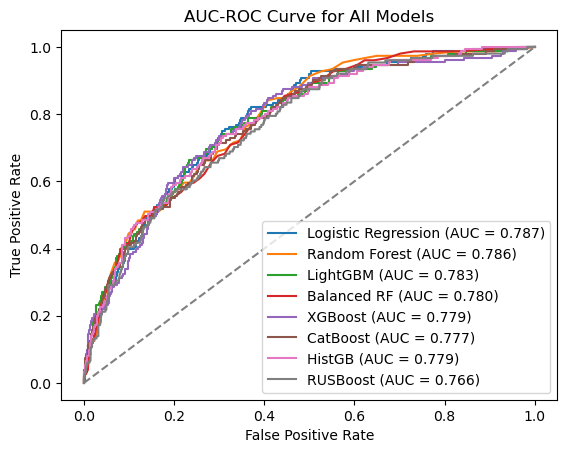

In [65]:
classify.run_classification(best_features[0], "DQ_TARGET", all_features)

In [68]:
consumer['DQ_TARGET'].value_counts()

DQ_TARGET
0.0    10994
1.0     1006
Name: count, dtype: int64


Logistic Regression Results
ROC-AUC: 0.777 | Accuracy: 0.731
Training Time: 0.2s
              precision    recall  f1-score   support

         0.0       0.96      0.74      0.83      1785
         1.0       0.18      0.66      0.28       151

    accuracy                           0.73      1936
   macro avg       0.57      0.70      0.56      1936
weighted avg       0.90      0.73      0.79      1936


Random Forest Results
ROC-AUC: 0.790 | Accuracy: 0.894
Training Time: 5.0s
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94      1785
         1.0       0.31      0.28      0.30       151

    accuracy                           0.89      1936
   macro avg       0.62      0.62      0.62      1936
weighted avg       0.89      0.89      0.89      1936

[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Info] Number of positive: 6479, number of negative: 6479
[Li

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:36:10] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results
ROC-AUC: 0.786 | Accuracy: 0.908
Training Time: 0.4s
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      1785
         1.0       0.36      0.23      0.28       151

    accuracy                           0.91      1936
   macro avg       0.65      0.60      0.61      1936
weighted avg       0.89      0.91      0.90      1936


CatBoost Results
ROC-AUC: 0.798 | Accuracy: 0.917
Training Time: 7.6s
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      1785
         1.0       0.43      0.22      0.29       151

    accuracy                           0.92      1936
   macro avg       0.69      0.60      0.62      1936
weighted avg       0.90      0.92      0.90      1936


HistGB Results
ROC-AUC: 0.788 | Accuracy: 0.904
Training Time: 2.3s
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      1785
         1.0       0.32    

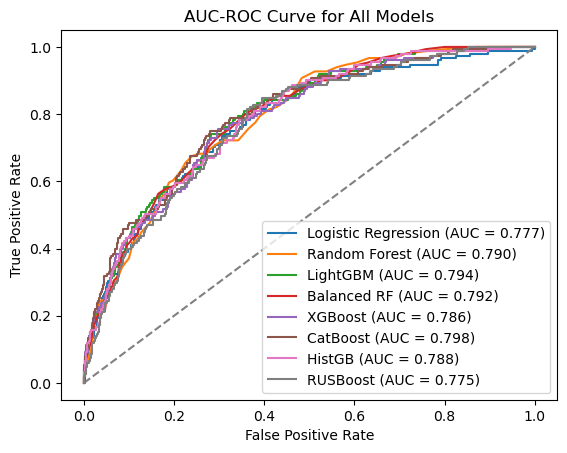

In [66]:
classify.run_classification(best_features[2], "DQ_TARGET", all_features)


In [77]:
tdf

,prism_consumer_id,prism_transaction_id,category,amount,credit_or_debit,posted_date,datetime,month
0,3023,0,4,0.05,CREDIT,2021-04-16,2021-04-16,2021-04
1,3023,1,12,481.56,CREDIT,2021-04-30,2021-04-30,2021-04
2,3023,2,4,0.05,CREDIT,2021-05-16,2021-05-16,2021-05
3,3023,3,4,0.07,CREDIT,2021-06-16,2021-06-16,2021-06
4,3023,4,4,0.06,CREDIT,2021-07-16,2021-07-16,2021-07
...,...,...,...,...,...,...,...,...
6407316,10533,6405304,31,-4.96,DEBIT,2022-03-11,2022-03-11,2022-03
6407317,10533,6405305,12,-63.48,DEBIT,2022-03-30,2022-03-30,2022-03
6407318,10533,6405306,12,-53.99,DEBIT,2022-03-30,2022-03-30,2022-03
6407319,10533,6405307,12,-175.98,DEBIT,2022-03-31,2022-03-31,2022-03


In [78]:
tdf = transactions.copy()
tdf["amount"] = tdf["amount"].where(tdf["credit_or_debit"] == "CREDIT", -tdf["amount"])

tdf['datetime'] = pd.to_datetime(tdf['posted_date'])
tdf['month'] = tdf['datetime'].apply(lambda d: d.strftime('%Y-%m'))

by_category = tdf[['prism_consumer_id', 'category', 'month', 'amount']].groupby(['prism_consumer_id', 'category', 'month']).sum()
by_category = by_category.reset_index()

by_category

,prism_consumer_id,category,month,amount
0,0,0,2021-03,-10.00
1,0,0,2021-04,-176.44
2,0,0,2021-05,-43.64
3,0,0,2021-06,646.04
4,0,0,2021-07,-55.14
...,...,...,...,...
1150463,9999,40,2023-08,-7.18
1150464,9999,42,2023-05,-25.00
1150465,9999,42,2023-06,-5.00
1150466,9999,45,2023-06,-3.00


In [80]:
consumer_intervals = tdf[['prism_consumer_id', 'month']].groupby('prism_consumer_id').agg(['min', 'max'])
consumer_intervals.columns = ['min', 'max']
consumer_intervals = consumer_intervals.to_dict()
categories = sorted(tdf['category'].unique())
consumer_category_months = pd.DataFrame(columns=['prism_consumer_id', 'month', 'category'])

consumer_category_months = []
for consumer in consumer_intervals['min'].keys():
    consumer_min = consumer_intervals['min'][consumer]
    consumer_max = consumer_intervals['max'][consumer]
    month_range = pd.date_range(consumer_min, consumer_max, freq='1M')
    month_range = [d.strftime('%Y-%m') for d in month_range] + [consumer_max]
    for category in categories:
        for month in month_range:
            consumer_category_months.append({
                "prism_consumer_id": consumer,
                "month": month,
                "category": category,
            })
consumer_category_months = pd.DataFrame(
    data=consumer_category_months,
    columns=['prism_consumer_id', 'category', 'month']
)

In [106]:
def get_categorical_features():
    """
    Extracts categorical features from the provided data in a more efficient manner.

    Args:
        data (dict): A dictionary containing DataFrames.

    Returns:
        DataFrame: DataFrame containing categorical features.
    """
    # Convert 'posted_date' to datetime and create a 'month' column.
    tdf["datetime"] = pd.to_datetime(tdf["posted_date"])
    tdf["month"] = tdf["datetime"].dt.strftime("%Y-%m")

    # Generate the permutations of consumers, categories, and months
    consumer_intervals = (
        tdf[["prism_consumer_id", "month"]]
        .groupby("prism_consumer_id")
        .agg(["min", "max"])
    )
    consumer_intervals.columns = ["min", "max"]
    consumer_intervals = consumer_intervals.to_dict()
    categories = sorted(tdf["category"].unique())

    consumer_category_months = []
    for con in consumer_intervals["min"].keys():
        consumer_min = consumer_intervals["min"][con]
        consumer_max = consumer_intervals["max"][con]
        month_range = pd.date_range(consumer_min, consumer_max, freq="1M")
        month_range = [d.strftime("%Y-%m") for d in month_range] + [consumer_max]

        for category in categories:
            for month in month_range:
                consumer_category_months.append(
                    {
                        "prism_consumer_id": con,
                        "month": month,
                        "category": category,
                    }
                )

    consumer_category_months_df = pd.DataFrame(consumer_category_months)

    # Group the tdf data by 'prism_consumer_id', 'category', and 'month' and aggregate 'amount'
    by_category = (
        tdf[["prism_consumer_id", "category", "month", "amount"]]
        .groupby(["prism_consumer_id", "category", "month"])
        .sum()
        .reset_index()
    )

    # Merge the generated consumer-category-month combinations with the aggregated data
    by_category = by_category.merge(
        consumer_category_months_df,
        on=["prism_consumer_id", "category", "month"],
        how="right",
    )

    # Fill any missing values with 0
    by_category = by_category.fillna(0)

    # Calculate the difference of 'amount' for each consumer-category group (diff of consecutive months)
    by_category["diffs"] = by_category.groupby(
        ["prism_consumer_id", "category"]
    )["amount"].transform(lambda x: x.diff())

    # Aggregate the mean and std of the amounts for each consumer-category group
    metrics = (
        by_category.drop(columns="month")
        .groupby(["prism_consumer_id", "category"])
        .agg(["mean", "std"])
    )

    # Aggregate account balances by 'prism_consumer_id'
    acct_on_cons = (
        acct[["prism_consumer_id", "balance"]].groupby("prism_consumer_id").sum()
    )

    # Create a pivot table for the consumer-category statistics
    pivot_df = metrics.pivot_table(
        index="prism_consumer_id", columns="category"
    )
    pivot_df.columns = [f"{col[2]}_{col[0]}_{col[1]}" for col in pivot_df.columns]

    # Fill any NaN values with 0
    pivot_df = pivot_df.fillna(0).reset_index()

    # Merge the consumer statistics and account balance data
    pivot_df = pivot_df.merge(consumer, on="prism_consumer_id", how="left")
    pivot_df = pivot_df.merge(acct_on_cons, on="prism_consumer_id", how="left")

    return pivot_df


In [119]:
con_stats = get_categorical_features()

In [120]:
con_stats.head()

,prism_consumer_id,0_amount_mean,1_amount_mean,2_amount_mean,3_amount_mean,4_amount_mean,6_amount_mean,7_amount_mean,8_amount_mean,9_amount_mean,11_amount_mean,12_amount_mean,13_amount_mean,14_amount_mean,16_amount_mean,17_amount_mean,18_amount_mean,19_amount_mean,20_amount_mean,21_amount_mean,22_amount_mean,23_amount_mean,24_amount_mean,25_amount_mean,26_amount_mean,27_amount_mean,28_amount_mean,29_amount_mean,30_amount_mean,31_amount_mean,32_amount_mean,33_amount_mean,34_amount_mean,35_amount_mean,36_amount_mean,37_amount_mean,38_amount_mean,39_amount_mean,40_amount_mean,41_amount_mean,42_amount_mean,43_amount_mean,44_amount_mean,45_amount_mean,46_amount_mean,47_amount_mean,48_amount_mean,49_amount_mean,0_amount_std,1_amount_std,2_amount_std,3_amount_std,4_amount_std,6_amount_std,7_amount_std,8_amount_std,9_amount_std,11_amount_std,12_amount_std,13_amount_std,14_amount_std,16_amount_std,17_amount_std,18_amount_std,19_amount_std,20_amount_std,21_amount_std,22_amount_std,23_amount_std,24_amount_std,25_amount_std,26_amount_std,27_amount_std,28_amount_std,29_amount_std,30_amount_std,31_amount_std,32_amount_std,33_amount_std,34_amount_std,35_amount_std,36_amount_std,37_amount_std,38_amount_std,39_amount_std,40_amount_std,41_amount_std,42_amount_std,43_amount_std,44_amount_std,45_amount_std,46_amount_std,47_amount_std,48_amount_std,49_amount_std,0_diffs_mean,1_diffs_mean,2_diffs_mean,3_diffs_mean,4_diffs_mean,6_diffs_mean,7_diffs_mean,8_diffs_mean,9_diffs_mean,11_diffs_mean,12_diffs_mean,13_diffs_mean,14_diffs_mean,16_diffs_mean,17_diffs_mean,18_diffs_mean,19_diffs_mean,20_diffs_mean,21_diffs_mean,22_diffs_mean,23_diffs_mean,24_diffs_mean,25_diffs_mean,26_diffs_mean,27_diffs_mean,28_diffs_mean,29_diffs_mean,30_diffs_mean,31_diffs_mean,32_diffs_mean,33_diffs_mean,34_diffs_mean,35_diffs_mean,36_diffs_mean,37_diffs_mean,38_diffs_mean,39_diffs_mean,40_diffs_mean,41_diffs_mean,42_diffs_mean,43_diffs_mean,44_diffs_mean,45_diffs_mean,46_diffs_mean,47_diffs_mean,48_diffs_mean,49_diffs_mean,0_diffs_std,1_diffs_std,2_diffs_std,3_diffs_std,4_diffs_std,6_diffs_std,7_diffs_std,8_diffs_std,9_diffs_std,11_diffs_std,12_diffs_std,13_diffs_std,14_diffs_std,16_diffs_std,17_diffs_std,18_diffs_std,19_diffs_std,20_diffs_std,21_diffs_std,22_diffs_std,23_diffs_std,24_diffs_std,25_diffs_std,26_diffs_std,27_diffs_std,28_diffs_std,29_diffs_std,30_diffs_std,31_diffs_std,32_diffs_std,33_diffs_std,34_diffs_std,35_diffs_std,36_diffs_std,37_diffs_std,38_diffs_std,39_diffs_std,40_diffs_std,41_diffs_std,42_diffs_std,43_diffs_std,44_diffs_std,45_diffs_std,46_diffs_std,47_diffs_std,48_diffs_std,49_diffs_std,evaluation_date,credit_score,DQ_TARGET,balance
0,0,248.718571,-216.050000,71.428571,1260.080000,-237.697143,2.851429,0.0,0.0,0.0,371.931429,0.000000,0.000000,-582.764286,-282.000000,-75.307143,-142.518571,-77.142857,-21.672857,-15.535714,0.000000,0.0,0.0,0.0,0.000000,-27.625714,-46.482857,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,-282.857143,0.0,-21.514286,-0.354286,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,566.494598,248.962432,188.982237,699.710997,262.984711,7.544171,0.0,0.0,0.0,592.351916,0.000000,0.000000,260.535263,301.228047,75.103900,113.811060,187.057414,25.447450,30.957104,0.000000,0.0,0.0,0.0,0.000000,49.456384,59.767494,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,446.083486,0.0,9.486908,0.937352,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.666667,-55.000000,83.333333,41.680000,-0.078333,0.000000,0.0,0.0,0.0,-233.333333,0.000000,0.000,16.951667,43.566667,1.116667e+00,19.978333,-83.333333,-3.888333,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,18.480,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,166.666667,0.0,4.183333,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,997.781801,284.732487,204.124145,1291.641588,458.529822,12.623812,0.0,0.0,0.0,433.627645,0.000000,0.000000,407.755589,555.281883,117.833719,162.410941,205.685845,38.740482,54.551123,0.000000,0.0,0.0,0.0,0.000000,67.316816,108.417330,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,288.074


Logistic Regression Results
ROC-AUC: 0.779 | Accuracy: 0.739
Training Time: 0.6s
              precision    recall  f1-score   support

         0.0       0.96      0.74      0.84      1855
         1.0       0.20      0.69      0.31       170

    accuracy                           0.74      2025
   macro avg       0.58      0.72      0.57      2025
weighted avg       0.90      0.74      0.79      2025


Random Forest Results
ROC-AUC: 0.793 | Accuracy: 0.887
Training Time: 11.9s
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94      1855
         1.0       0.29      0.23      0.25       170

    accuracy                           0.89      2025
   macro avg       0.61      0.59      0.60      2025
weighted avg       0.88      0.89      0.88      2025

[LightGBM] [Info] Number of positive: 7390, number of negative: 7390
[LightGBM] [Info] Total Bins 45227
[LightGBM] [Info] Number of data points in the train set: 14780, number of used fea

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:27:10] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results
ROC-AUC: 0.772 | Accuracy: 0.836
Training Time: 2.1s
              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91      1855
         1.0       0.22      0.39      0.28       170

    accuracy                           0.84      2025
   macro avg       0.58      0.63      0.60      2025
weighted avg       0.88      0.84      0.86      2025


CatBoost Results
ROC-AUC: 0.786 | Accuracy: 0.878
Training Time: 22.2s
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      1855
         1.0       0.28      0.28      0.28       170

    accuracy                           0.88      2025
   macro avg       0.60      0.61      0.61      2025
weighted avg       0.88      0.88      0.88      2025


HistGB Results
ROC-AUC: 0.795 | Accuracy: 0.872
Training Time: 4.8s
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93      1855
         1.0       0.28   

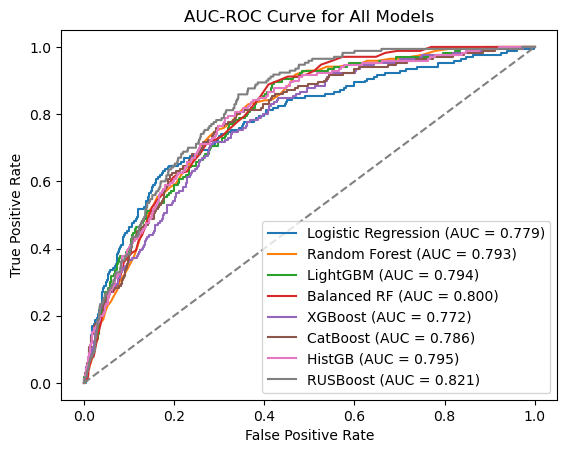

In [121]:
classify.run_classification(con_stats.drop(columns = ['prism_consumer_id', 'evaluation_date', 'DQ_TARGET']).columns, "DQ_TARGET", con_stats)